In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
# Display data preview
print("Training Data Preview:")
train_df.head()  # Displays the first 5 rows as a table

Training Data Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Display data preview
print("\nTest Data Preview:")
test_df.head()  # Displays the first 5 rows as a table


Test Data Preview:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
# Display basic information about the data
print("Training Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())

# Display summary statistics
print("\nTraining Data Summary Statistics:")
print(train_df.describe(include='all'))

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

Missing values in the training dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Missing values in the test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


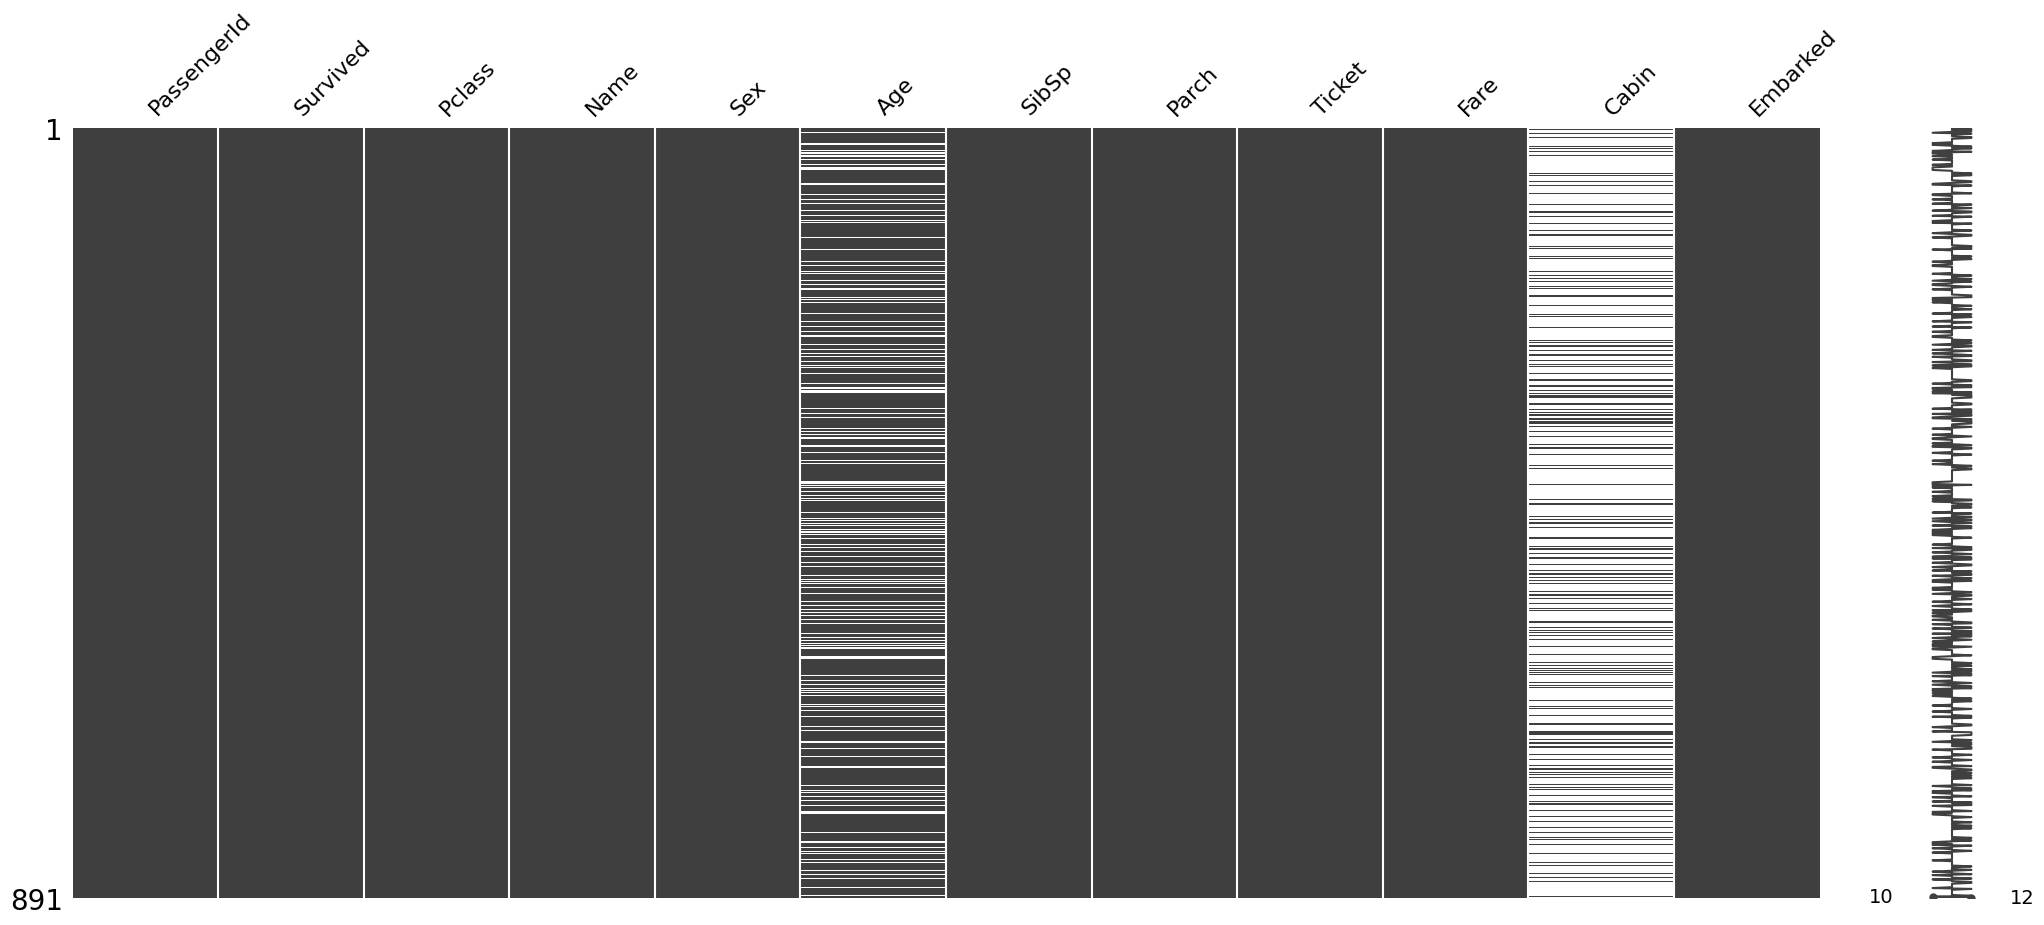

In [15]:
# Screen for missing values in the training dataset
print("Missing values in the training dataset:")
print(train_df.isnull().sum())

# Screen for missing values in the test dataset
print("\nMissing values in the test dataset:")
print(test_df.isnull().sum())

# Visualize missing values
import missingno as msno
msno.matrix(train_df)
plt.show()

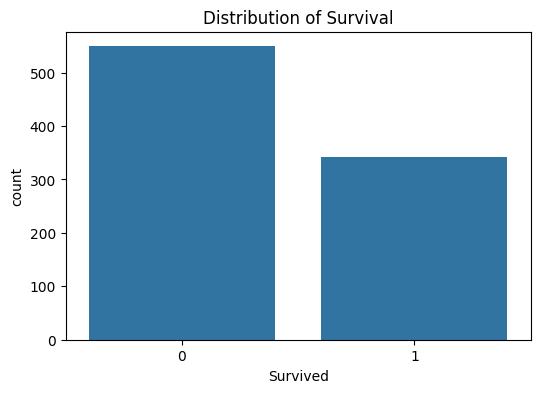

In [11]:
# Visualize distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survival')
plt.show()

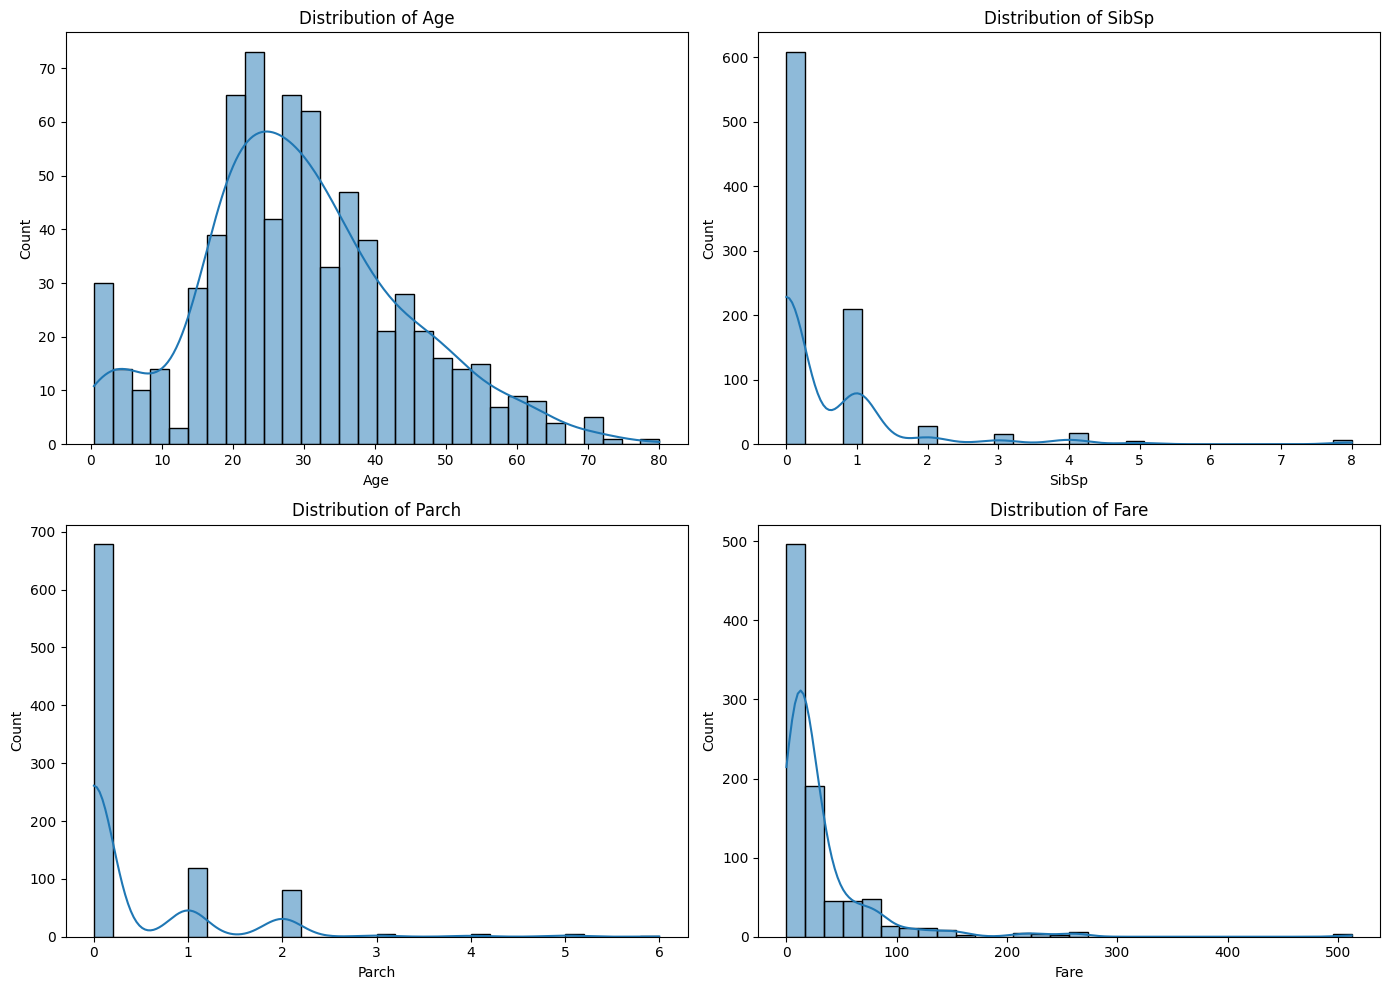

In [12]:
# Visualize distribution of numerical features
plt.figure(figsize=(14, 10))
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_df[feature].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

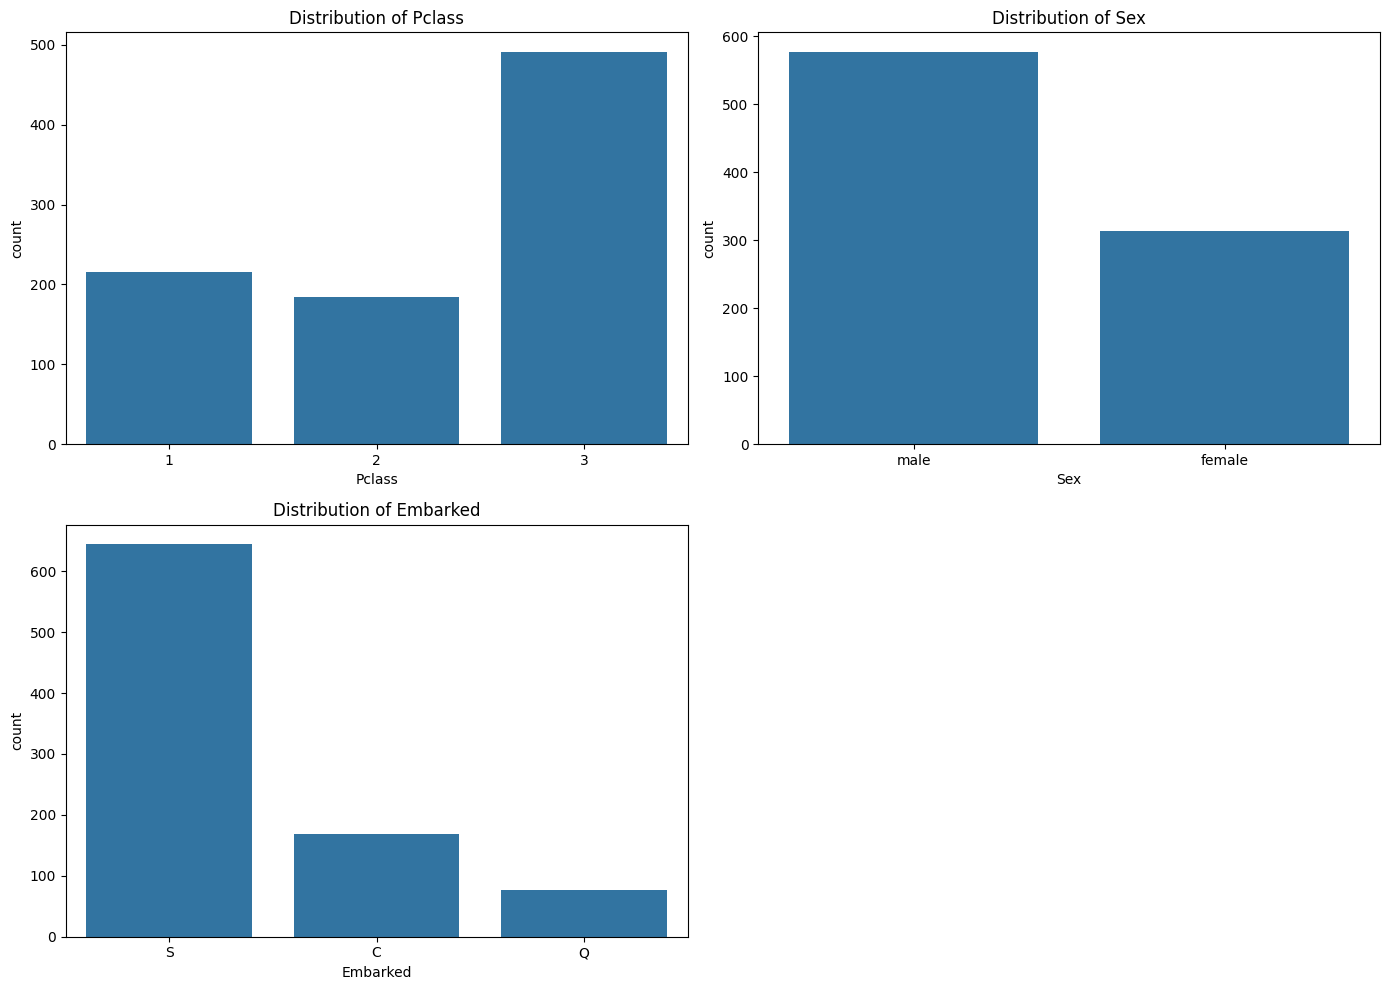

In [13]:
# Visualize distribution of categorical features
plt.figure(figsize=(14, 10))
categorical_features = ['Pclass', 'Sex', 'Embarked']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=train_df)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


Correlation Matrix:
            Pclass       Sex       Age     SibSp     Parch      Fare  \
Pclass    1.000000  0.131900 -0.369226  0.083081  0.018443 -0.549500   
Sex       0.131900  1.000000  0.093254 -0.114631 -0.245489 -0.182333   
Age      -0.369226  0.093254  1.000000 -0.308247 -0.189119  0.096067   
SibSp     0.083081 -0.114631 -0.308247  1.000000  0.414838  0.159651   
Parch     0.018443 -0.245489 -0.189119  0.414838  1.000000  0.216225   
Fare     -0.549500 -0.182333  0.096067  0.159651  0.216225  1.000000   
Embarked  0.157112  0.104057 -0.025252  0.066654  0.038322 -0.221226   
Survived -0.338481 -0.543351 -0.077221 -0.035322  0.081629  0.257307   

          Embarked  Survived  
Pclass    0.157112 -0.338481  
Sex       0.104057 -0.543351  
Age      -0.025252 -0.077221  
SibSp     0.066654 -0.035322  
Parch     0.038322  0.081629  
Fare     -0.221226  0.257307  
Embarked  1.000000 -0.163517  
Survived -0.163517  1.000000  


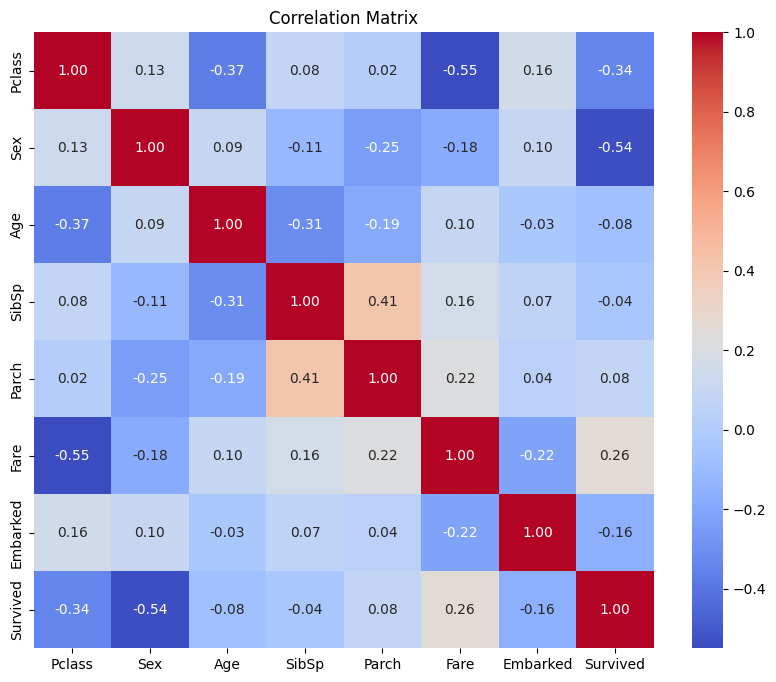

In [14]:
# Correlation Analysis
# Encode categorical variables
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

# Calculate correlation matrix
corr_matrix = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']].corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Verify that there are no more missing values
print("\nMissing values in the training dataset after filling:")
print(train_df.isnull().sum())

print("\nMissing values in the test dataset after filling:")
print(test_df.isnull().sum())



Missing values in the training dataset after filling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Missing values in the test dataset after filling:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


C:\Users\irsa\AppData\Local\Temp\ipykernel_28928\1900757591.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\irsa\AppData\Local\Temp\ipykernel_28928\1900757591.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [19]:
# Convert 'Sex' column to binary values
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})
test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0})

# Display the updated data preview
print("Updated Training Data Preview with 'Sex' as binary:")
print(train_df.head())

Updated Training Data Preview with 'Sex' as binary:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            3

In [21]:
# Encode 'Embarked' column
label_encoder = LabelEncoder()
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])
test_df['Embarked'] = label_encoder.transform(test_df['Embarked'])

# Display the updated data preview
print("Updated Training Data Preview with 'Embarked' is encoded:")
print(train_df.head())

Updated Training Data Preview with 'Embarked' is encoded:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         2  
1          PC 17599  71.2833   C85         0  
2  STON/O2. 3101282   7.9250   NaN         2  
3            113803  53.1000  C123         2  
4  

In [22]:
# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

In [23]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Evaluate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.82


In [26]:
# Save the model
joblib.dump(model, 'titanic_model.pkl')
print("Model saved as titanic_model.pkl")

Model saved as titanic_model.pkl
